Reto semana 3
Deteccion de objetos

In [1]:
project_id = 'fddf3890-d6c4-4f5e-8302-617750825a83' # Replace with your project ID
cv_key = 'a30769fdadd6498caddfdfe28ca3e2ec' # Replace with your prediction resource primary key
cv_endpoint = 'https://customvisio-prediction.cognitiveservices.azure.com/' # Replace with your prediction resource endpoint

model_name = 'detect-produce' # this must match the model name you set when publishing your model iteration exactly (including case)!
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model detect-produce in project fddf3890-d6c4-4f5e-8302-617750825a83


In [2]:
!pip install azure-cognitiveservices-vision-customvision

     |████████████████████████████████| 62 kB 506 kB/s eta 0:00:011


Detecting objects in data/object-detection/produce.jpg using model detect-produce in project fddf3890-d6c4-4f5e-8302-617750825a83...


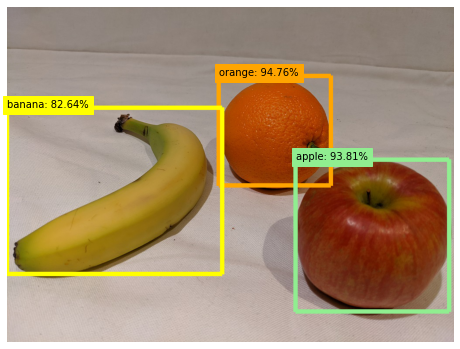

In [3]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

# Load a test image and get its dimensions
test_img_file = os.path.join('data', 'object-detection', 'produce.jpg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape

# Get a prediction client for the object detection model
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
predictor = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

# Detect objects in the test image
with open(test_img_file, mode="rb") as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

# Create a figure to display the results
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# Display the image with boxes around each detected object
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
object_colors = {
    "apple": "lightgreen",
    "banana": "yellow",
    "orange": "orange"
}
for prediction in results.predictions:
    color = 'white' # default for 'other' object tags
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)


Resultados de la deteccion